In [29]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
import skimage

# Dúvida: Arquivo 1.txt contém os locais das assinaturas?

# Conceitos vistos em sala:
# 1- Operações pontuais
# 2- Equalização histogrâmica
# 3- Filtros: gaussiano, média, mediana
# 4- Operações morfológicas <<
# 5- Transformada de Hough <<
# 6- Transformações geométricas (zoom/interpolação)

## Imagem 4 da base de dados

248 0 (4000, 3000)


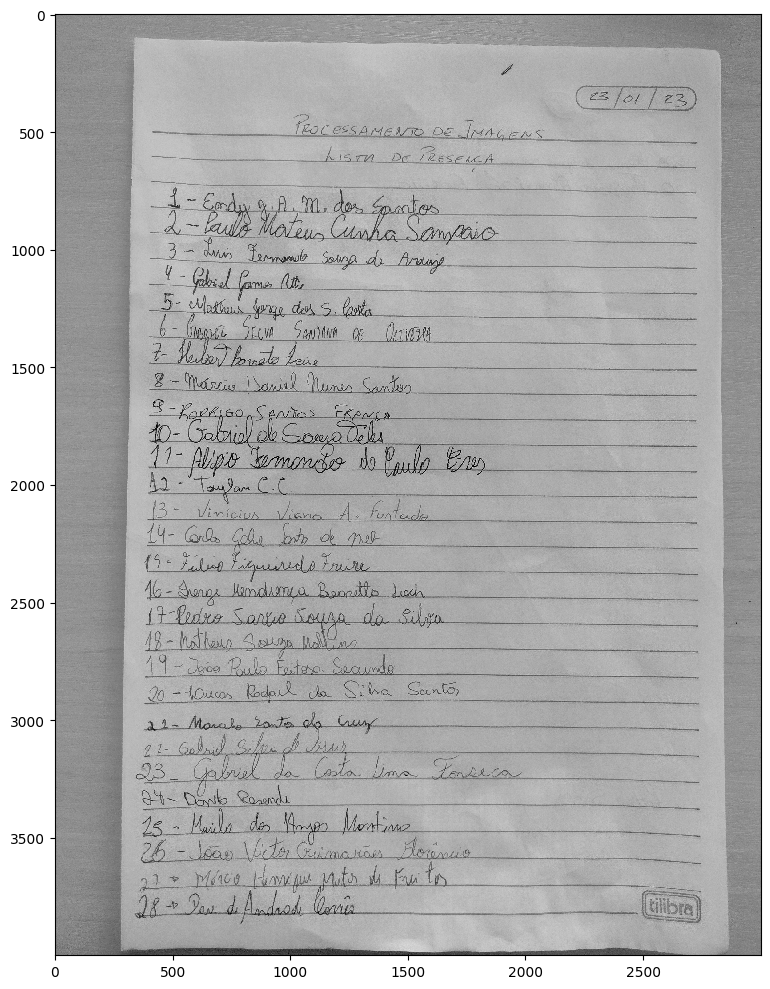

In [33]:
img = (io.imread("base-de-dados/4.jpg",as_gray=True)*255).astype("uint8")
altura,largura = img.shape
print(img.max(), img.min(), img.shape)
plt.figure(figsize=(10,10))
io.imshow(img)

## Ler arquivo com locais das assinaturas

In [4]:
arq = open("base-de-dados/4.txt", "r")
conteudo = arq.read()
conteudo

'0 0.378405 0.201292 0.345396 0.031519\n0 0.424330 0.226006 0.429593 0.023639\n0 0.379362 0.252869 0.358791 0.037250\n0 0.275552 0.282239 0.174133 0.032952\n0 0.322912 0.306237 0.265027 0.035101\n0 0.365010 0.334532 0.362618 0.032952\n0 0.275552 0.359246 0.212404 0.039399\n0 0.347788 0.387183 0.332001 0.045130\n0 0.322434 0.423717 0.315736 0.023639\n0 0.327696 0.443416 0.291817 0.032952\n0 0.406152 0.474219 0.421938 0.040115\n0 0.271246 0.502156 0.146387 0.031519\n0 0.365489 0.526870 0.342526 0.029370\n0 0.321477 0.553375 0.290860 0.032235\n0 0.314779 0.578089 0.290860 0.034384\n0 0.350658 0.611399 0.360705 0.030803\n0 0.361661 0.636829 0.382710 0.035817\n0 0.302341 0.664050 0.260243 0.030086\n0 0.337264 0.687331 0.310952 0.032235\n0 0.376013 0.717776 0.398019 0.031519\n0 0.319563 0.751085 0.275552 0.029370\n0 0.299471 0.772934 0.260243 0.030086\n0 0.433420 0.805169 0.478388 0.031519\n0 0.257851 0.832032 0.157868 0.023639\n0 0.351137 0.857821 0.323390 0.030803\n0 0.390843 0.887191 0.40

In [5]:
linhas = conteudo.split("\n")
linhas

['0 0.378405 0.201292 0.345396 0.031519',
 '0 0.424330 0.226006 0.429593 0.023639',
 '0 0.379362 0.252869 0.358791 0.037250',
 '0 0.275552 0.282239 0.174133 0.032952',
 '0 0.322912 0.306237 0.265027 0.035101',
 '0 0.365010 0.334532 0.362618 0.032952',
 '0 0.275552 0.359246 0.212404 0.039399',
 '0 0.347788 0.387183 0.332001 0.045130',
 '0 0.322434 0.423717 0.315736 0.023639',
 '0 0.327696 0.443416 0.291817 0.032952',
 '0 0.406152 0.474219 0.421938 0.040115',
 '0 0.271246 0.502156 0.146387 0.031519',
 '0 0.365489 0.526870 0.342526 0.029370',
 '0 0.321477 0.553375 0.290860 0.032235',
 '0 0.314779 0.578089 0.290860 0.034384',
 '0 0.350658 0.611399 0.360705 0.030803',
 '0 0.361661 0.636829 0.382710 0.035817',
 '0 0.302341 0.664050 0.260243 0.030086',
 '0 0.337264 0.687331 0.310952 0.032235',
 '0 0.376013 0.717776 0.398019 0.031519',
 '0 0.319563 0.751085 0.275552 0.029370',
 '0 0.299471 0.772934 0.260243 0.030086',
 '0 0.433420 0.805169 0.478388 0.031519',
 '0 0.257851 0.832032 0.157868 0.0

In [6]:
locais_assinaturas = []
for i in range(len(linhas)):
    n = linhas[i].split(" ")
    n = np.array(n).astype(float)
    locais_assinaturas.append(n)

locais_assinaturas

[array([0.      , 0.378405, 0.201292, 0.345396, 0.031519]),
 array([0.      , 0.42433 , 0.226006, 0.429593, 0.023639]),
 array([0.      , 0.379362, 0.252869, 0.358791, 0.03725 ]),
 array([0.      , 0.275552, 0.282239, 0.174133, 0.032952]),
 array([0.      , 0.322912, 0.306237, 0.265027, 0.035101]),
 array([0.      , 0.36501 , 0.334532, 0.362618, 0.032952]),
 array([0.      , 0.275552, 0.359246, 0.212404, 0.039399]),
 array([0.      , 0.347788, 0.387183, 0.332001, 0.04513 ]),
 array([0.      , 0.322434, 0.423717, 0.315736, 0.023639]),
 array([0.      , 0.327696, 0.443416, 0.291817, 0.032952]),
 array([0.      , 0.406152, 0.474219, 0.421938, 0.040115]),
 array([0.      , 0.271246, 0.502156, 0.146387, 0.031519]),
 array([0.      , 0.365489, 0.52687 , 0.342526, 0.02937 ]),
 array([0.      , 0.321477, 0.553375, 0.29086 , 0.032235]),
 array([0.      , 0.314779, 0.578089, 0.29086 , 0.034384]),
 array([0.      , 0.350658, 0.611399, 0.360705, 0.030803]),
 array([0.      , 0.361661, 0.636829, 0.

### Usar opencv para desenhar os retângulos das assinaturas

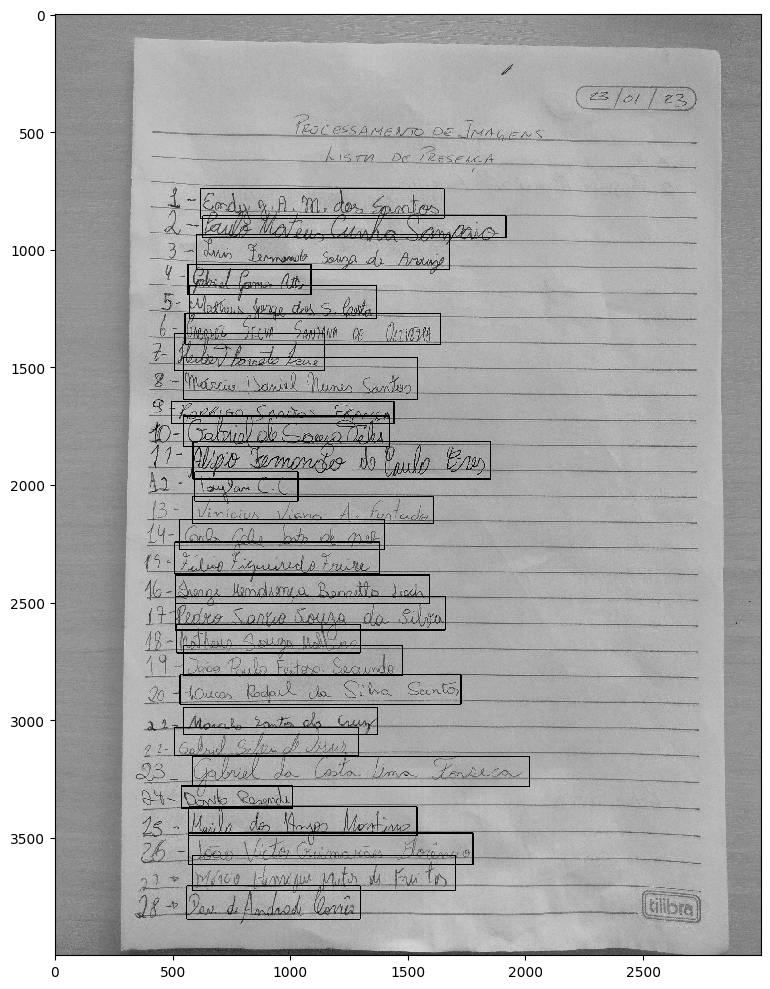

In [7]:
# https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html

plt.figure(figsize=(10,10))

# Usar os valores da imagem.txt para desenhar o quadrado
# target(tipo de alvo-assinatura) pontocentralX pontocentralY(coordenadas) larguraDaAssinatura alturaDaAssinatura
alturaImg, larguraImg = img.shape
for local in locais_assinaturas:

    colunaCentro = int(local[1] * larguraImg)
    linhaCentro = int(local[2] * alturaImg)
    centro = (linhaCentro, colunaCentro)
    #print(centro)

    offsetColuna = int(local[3] * larguraImg / 2)
    offsetLinha = int(local[4] * alturaImg / 2)
    #print(offsetLinha, offsetColuna)

    coluna_top = (colunaCentro - offsetColuna)
    linha_top = (linhaCentro - offsetLinha )
    top_left = (coluna_top, linha_top)
    #print(top_left)

    coluna_bot = (colunaCentro + offsetColuna)
    linha_bot = (linhaCentro + offsetLinha)
    bot_right = (coluna_bot, linha_bot)
    #print(bot_right)
    #print("\n")
    
    cv2.rectangle(img, top_left, bot_right, color=(0,0,255), thickness=4) # coordenadas: (coluna,linha)

io.imshow(img)
img = (io.imread("base-de-dados/4.jpg",as_gray=True)*255).astype("uint8")

## Histograma
Provavelmente não vai ajudar muito no processamento, mas pode ser usado para encontrar um limite para a limiarização

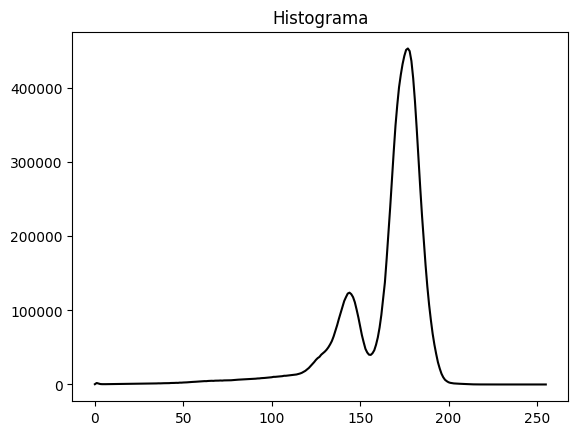

In [8]:
h = np.histogram(img,bins=256,range=(0,255))[0]
plt.plot (h,'-k')
plt.title("Histograma")
plt.show()

## Binarizar imagem (limiarização)

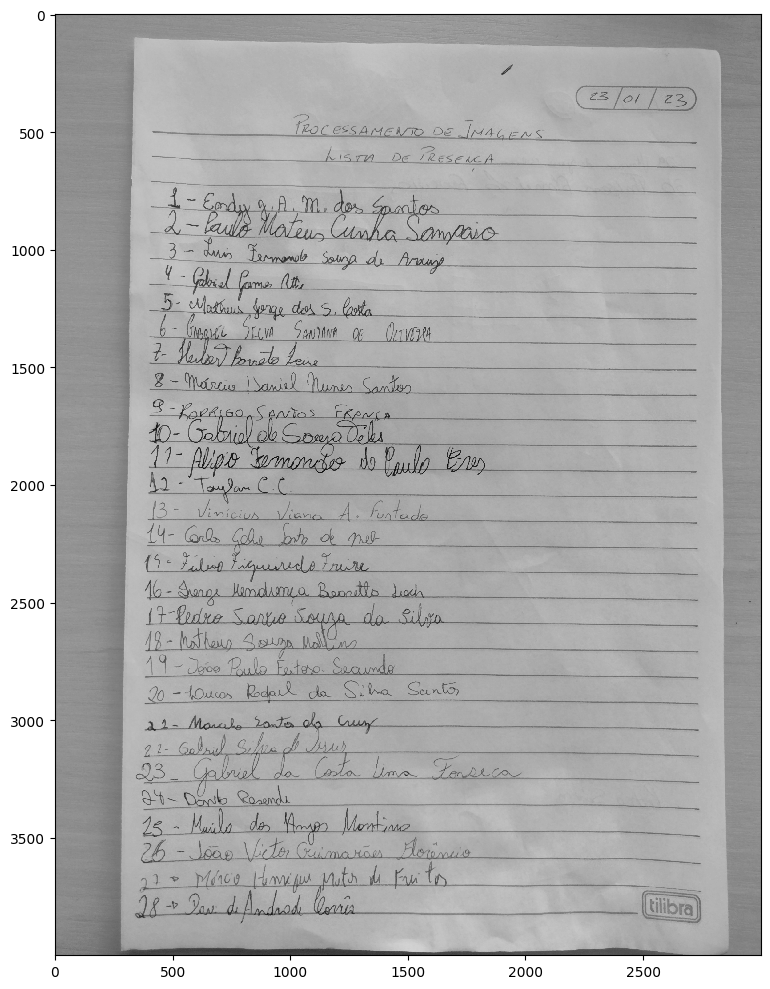

In [34]:
# Aplicar um filtro da mediana para suavizar as diferenças de luminosidade das imagens
img_median = cv2.medianBlur(img,5)
plt.figure(figsize=(10,10))
io.imshow(img_median)

# img_median2 = skimage.filters.median(img)
# plt.figure(figsize=(10,10))
# io.imshow(img_median2)

In [35]:
# Usar função para descobrir o melhor limiar
from skimage.filters import threshold_otsu
limiar = threshold_otsu(img_median)
print(limiar)
#Ler sobre otsu_optimization: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

153


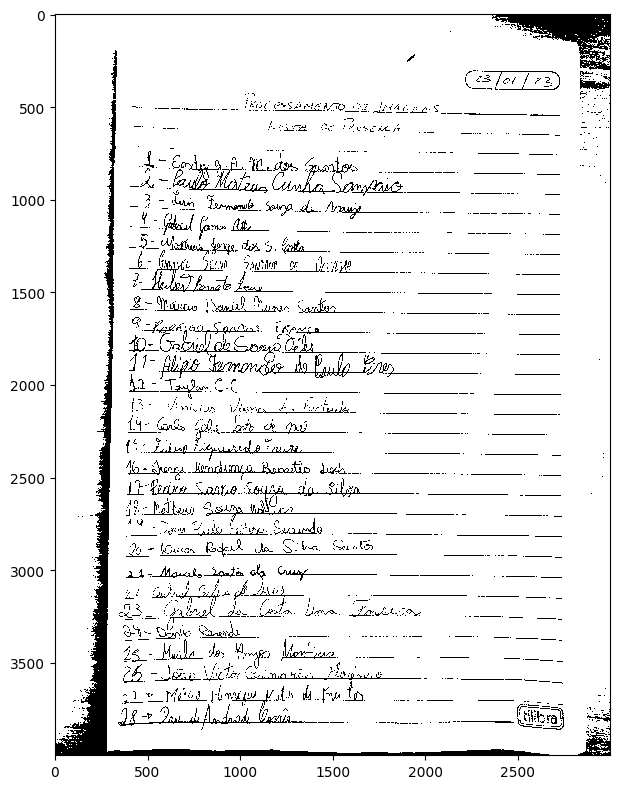

In [40]:
plt.figure(figsize=(8,8))
#img_binaria = img.copy()
img_binaria = img_median.copy()
limiar = 132
#img_binaria[img_binaria<100] = 255 # Transformar células mais escuras em background
img_binaria[img_binaria>=limiar] = 255 # Background
img_binaria[img_binaria<limiar] = 0

# Inverter
#img_binaria = 255 - img_binaria
io.imshow(img_binaria)
del img_binaria

152.0


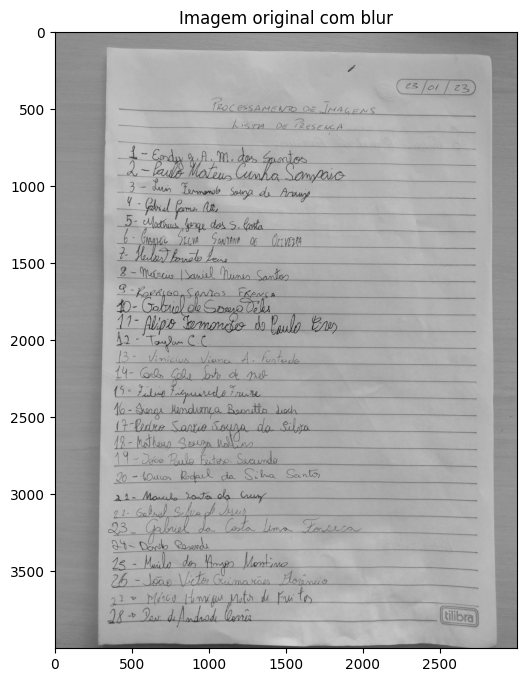

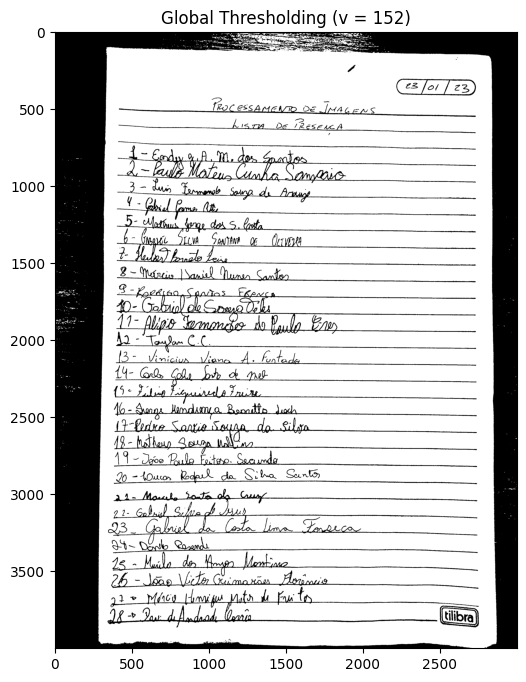

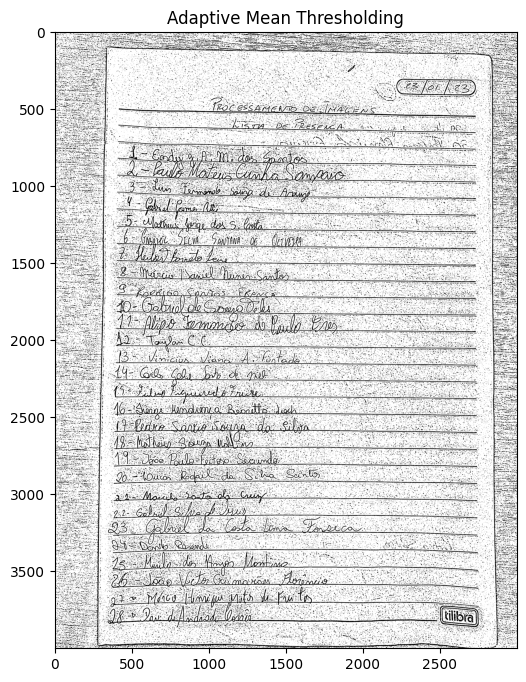

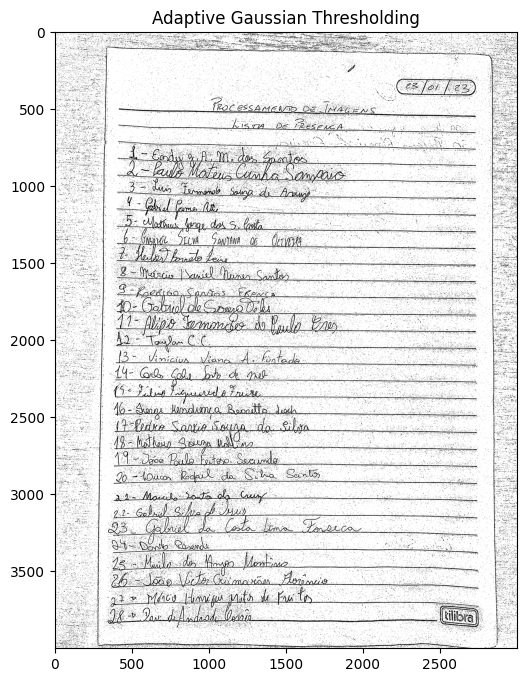

In [23]:
# https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
img_blur = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img_blur,limiar,255,cv2.THRESH_BINARY)
print(ret)
th2 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

plt.figure(figsize=(8,8))
plt.imshow(img_blur,cmap='gray',vmin=0,vmax=255)
plt.title("Imagem original com blur")
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(th1,cmap='gray',vmin=0,vmax=255)
plt.title(f'Global Thresholding (v = {limiar})')
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(th2,cmap='gray',vmin=0,vmax=255)
plt.title('Adaptive Mean Thresholding')
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(th3,cmap='gray',vmin=0,vmax=255)
plt.title('Adaptive Gaussian Thresholding')
plt.show()

## Bounding box
- Usar interseção sobre união para descobrir a acurácia das boxes encontradas (Intersection over Union (IoU))
- Os locais reais estão nos arquivos txt da base de dados

The bounding box is an imaginary rectangular box that contains an object or a set of points. When used in digital image processing, the bounding box refers to the border’s coordinates that enclose an image. They are often used to bind or identify a target and serve as a reference point for object detection and create a collision box for that object

### Perfil vertical (coluna 500)
Binarizar primeiro, depois fazer o somatório dos pixels e usar pra ver se o pixel é background ou assinatura

(Como usar para encontrar a bounding box?)

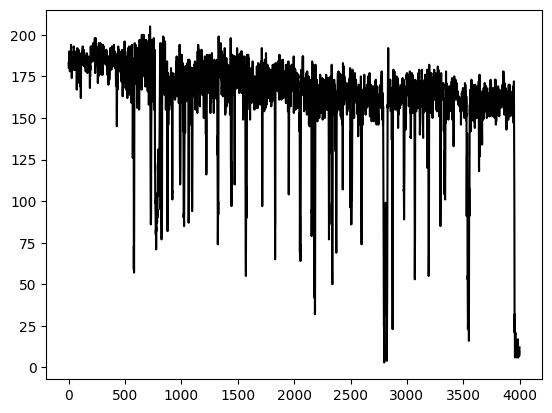

In [105]:
plt.plot(img[:,500],"-k")

### Perfil horizontal (linha 550)

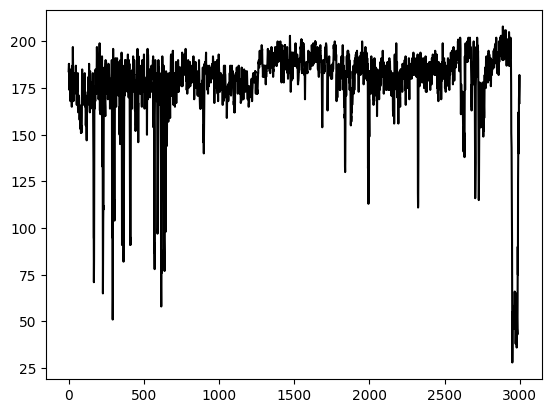

In [107]:
plt.plot(img[550,:],"-k")

## Algoritmos de segmentação
Mudanças bruscas nos níveis de cinza (Descontinuidades):
- Pontos isolados
- Linhas
- Bordas na imagem

Similaridades:
- Limiarização (binarização)
- Crescimento de regiões
- Divisão e fusão de regiões


### Bordas - Sobel

134 0 (4000, 3000)


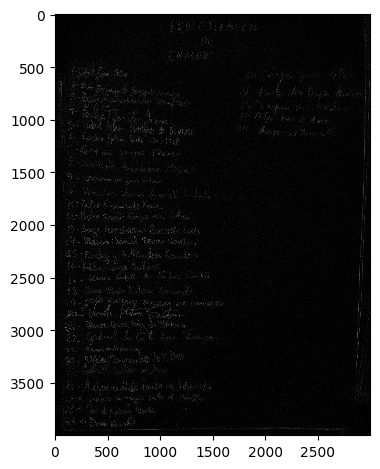

In [115]:
sobel_ = (sobel(img)*255).astype("uint8")
print(sobel_.max(), sobel_.min(), sobel_.shape)
io.imshow(sobel_)

# Dando zoom, ainda é possível ler algumas assinaturas, mas só se a letra
# for grossa o suficiente

In [113]:
#https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imsave
io.imsave("teste_sobel.jpg",sobel_)

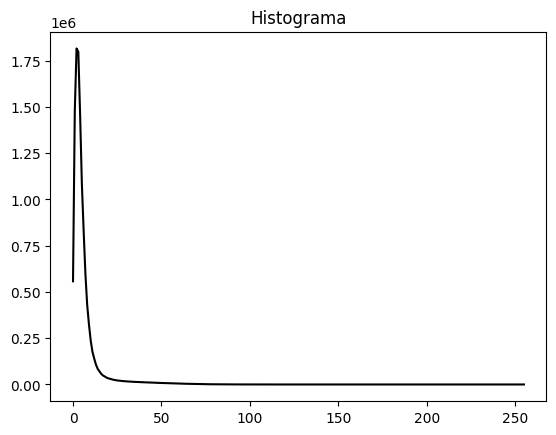

In [114]:
h = np.histogram(sobel_,bins=256,range=(0,255))[0]
plt.plot (h,'-k')
plt.title("Histograma")
plt.show()